In [16]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib
from pandas import DataFrame

In [17]:
def read(file):
    return pd.read_csv(file)
features = read('csv_data.csv')

In [18]:
pd.options.display.max_columns = 30
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181

In [19]:
pmax = np.array(features['Pmax [N]'])
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

In [20]:
features = np.array(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [21]:
clf = svm.SVR(kernel = "poly")
clf.fit(train_features,train_labels)
print(clf.score(train_features, train_labels))
print(test_labels.shape)

0.7144429886496988
(45,)


C:\Users\fmh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
pmax_pred = np.empty(test_labels.shape)

errors = 0
i = 0
for X,y in zip(test_features, test_labels):
#    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")
    errors += abs(clf.predict([X])[0] - y)
    pmax_pred[i] = clf.predict([X])[0]
    i += 1 
    
errors = errors / test_features.shape[0]
print(pmax_pred)

#print('Mean Absolute error:',round(errors, 2) , 'newton.')

# Calculate mean absolute percentage error
#mape = 100 * (errors / test_labels)

# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')


[17.71799544 15.60456111 15.33398873 31.48792439  5.11534308 18.42027357
 14.81434084 59.31670378 14.38511491 14.07862956 16.07333421 17.83538596
 17.05607316 13.36390506 17.1580408  14.50093251 15.68584219 17.81978778
 16.57064584 17.15010526 36.73339408 17.45709269 19.46459284 19.39772615
 28.79729123 16.16052549 35.729324   17.46048041 34.84408646 17.61594093
 18.1950517  15.22529379 17.84170517  3.4463037  27.51644713 17.76659676
 16.33746588 13.67033472 15.27493242 17.79157474 36.4566992  16.1749805
 18.88059577  0.83472957 17.37337532]


In [23]:
#new = DataFrame(pmax_pred, test_labels)
#new.to_csv("line_to_scatter_converter.csv")

In [24]:
mid = pd.read_csv("line_to_scatter_converter.csv")
mid.sort_values(by = "truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)

In [25]:
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["predict"]
label = final["truth"]

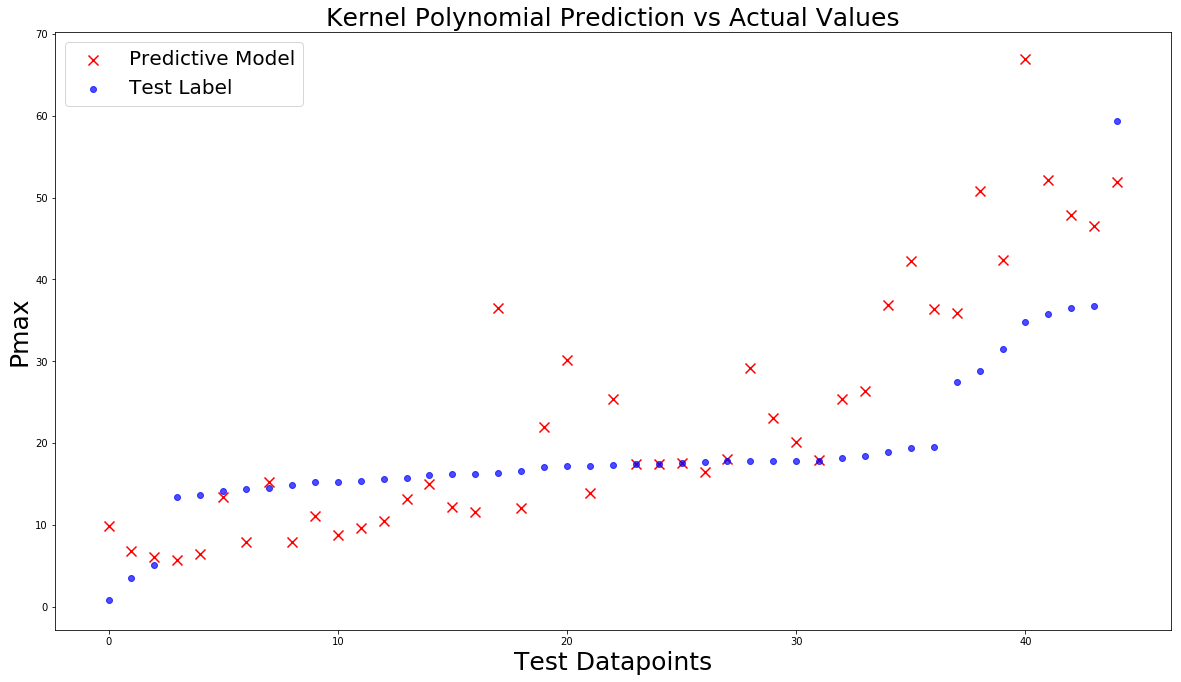

In [29]:
fig = plt.figure(figsize=(20,11))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("Kernel Polynomial Prediction vs Actual Values", fontsize = 25)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 20})



plt.savefig("Polynomial_plot.png")